# Customer Retention Strategy for Model Fitness through Predictive Analysis

## Introduction

In today’s rapidly evolving digital landscape, music is more than just entertainment; it's a vital part of daily life that reflects cultural identities and personal preferences. With the rise of online music streaming services, understanding user behavior through data analysis has become increasingly important. These insights can drive effective marketing strategies, enhance user engagement, and inform key business decisions.

This project aims to explore and compare the musical preferences of users in two distinct cities—Springfield and Shelbyville. By analyzing streaming data, including song choices, artist preferences, and genre popularity, we seek to uncover patterns that highlight cultural and behavioral differences between these locations. Moreover, this analysis will examine how these preferences vary across different days of the week, providing a nuanced view of user behavior.

### Objective
The primary objective of this project is to test the following hypothesis:

**Hypothesis:** User activity and musical preferences differ depending on the day of the week and the city.

Through a comprehensive analysis of user interaction data, we aim to identify whether Springfield and Shelbyville exhibit distinct patterns in music streaming behavior. These findings could reveal cultural nuances and provide actionable insights for tailoring marketing efforts and improving user engagement in both cities.

### Scope of the Project
This analysis will encompass the following steps:

- **Data Exploration and Cleaning:** A thorough review of the dataset to understand its structure, identify any missing values, and prepare the data for analysis.
- **Descriptive Analysis:** Examination of user activity across the two cities and various days of the week to establish baseline trends.
- **Hypothesis Testing:** Statistical tests will be conducted to determine if there are significant differences in user activity based on location and time.
- **Visualization:** Creation of visual representations to highlight key findings and support conclusions.
- **Recommendations:** Strategic recommendations will be provided based on the findings, aiming to enhance user engagement and optimize marketing strategies in both cities.


### Library Import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Data Loading

In [2]:
# Load the data
data = pd.read_csv(r'C:\Users\Barbs\Documents\GitHub\English\Customer Retention Strategy for Model Fitness\gym_churn_us.csv')

# Display the first few rows of the DataFrame to verify data loading
print("Preliminary view of the data:")
display(data.head())

Preliminary view of the data:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Data preparation

In [3]:
## Data Preparation

def initial_data_analysis(data):
    
    # Display the dataset size
    print("\nDataset size:")
    print(data.shape)
    print("\n" + "-"*50 + "\n")
    
    # Dataset information
    print("\nDataset information:")
    data_info = data.info()
    print("\n" + "-"*50 + "\n")

    # Check for missing values
    print("\nMissing values in each column:")
    missing_values = data.isnull().sum()
    print(missing_values)
    print("\n" + "-"*50 + "\n")

    # Check for duplicate values
    print("\nNumber of duplicate rows:")
    duplicates = data.duplicated().sum()
    print(duplicates)
    print("\n" + "-"*50 + "\n")

    # Statistical summary of the dataset
    print("\nStatistical summary of the dataset:")
    stats_summary = data.describe()
    display(stats_summary)
    
    return data_info, missing_values, duplicates, stats_summary

# Perform the initial analysis of the dataset
data_info, missing_values, duplicates, stats_summary = initial_data_analysis(data)


Dataset size:
(4000, 14)

--------------------------------------------------


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime           

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
# Convert column names to lowercase
data.columns = [col.lower() for col in data.columns]

# Rename columns for better clarity
data.rename(columns={
    'avg_additional_charges_total': 'total_additional_charges',
    'avg_class_frequency_total': 'total_class_frequency',
    'avg_class_frequency_current_month': 'current_month_class_frequency'
}, inplace=True)

# Verify the new column names
print(data.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age', 'total_additional_charges',
       'month_to_end_contract', 'lifetime', 'total_class_frequency',
       'current_month_class_frequency', 'churn'],
      dtype='object')


The Model Fitness dataset contains 4,000 user records and 14 features, with no missing or duplicate values, and the correct data types. Initial descriptive statistics reveal that the average age of users is 29 years, with an average additional expenditure of 147 monetary units and an average class attendance frequency of 1.88 times per week. The churn rate is 26.5%.

## Exploratory Data Analysis (EDA)

### Mean Values and Standard Deviation by Group


In [5]:
# Mean values by group (churn vs. no churn)
churn_count = data['churn'].value_counts()
print(churn_count)

churn_percentage = churn_count[1] / len(data) * 100
print(f"{churn_percentage:.1f}% of the members have churned")
print("\n" + "-"*50 + "\n")

# Mean values of features by group
mean_values_churn = data.groupby('churn').mean().T
display(mean_values_churn)

churn
0    2939
1    1061
Name: count, dtype: int64
26.5% of the members have churned

--------------------------------------------------



churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
total_additional_charges,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


The analysis shows that 26.5% of gym members have churned. When comparing the average characteristics between customers who stayed and those who churned, it is observed that the former tend to live closer to the gym, work for a partner company, and have joined through promotions with friends. Additionally, those who stayed tend to have longer contracts, participate in group visits, be slightly older, and spend more on additional gym services. They also exhibit longer membership durations and higher total and current month class frequencies than those who churned.

### Visualization of Specific Distributions by Group

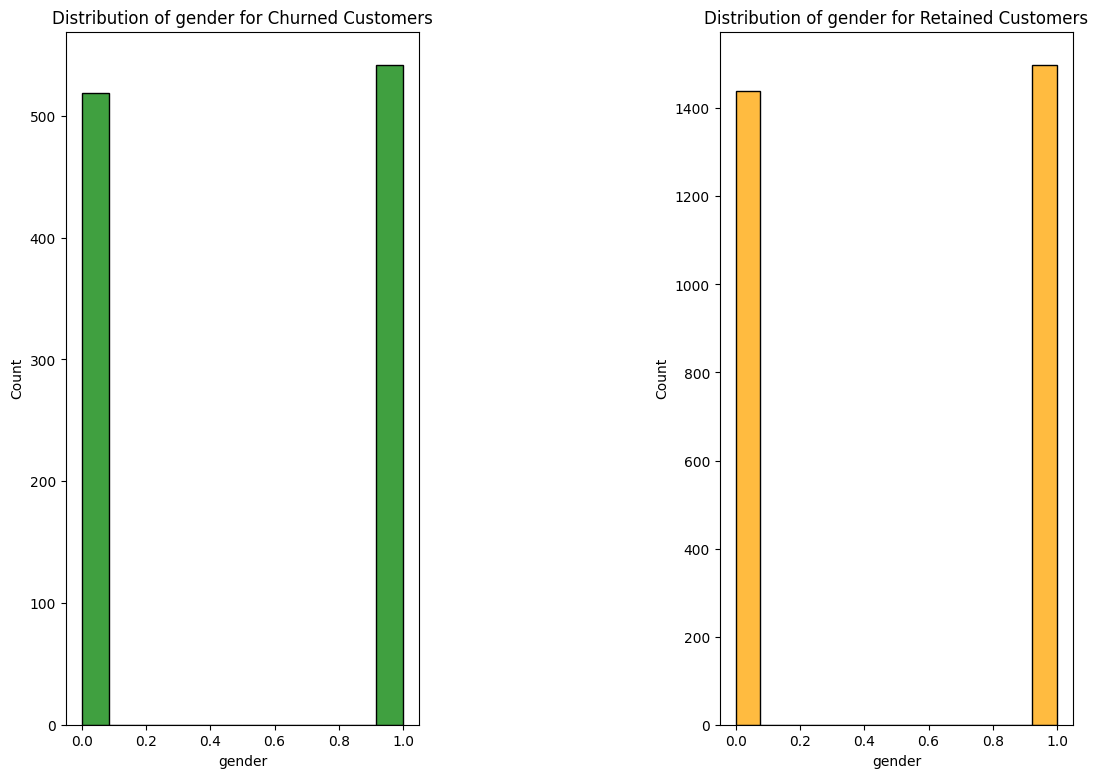

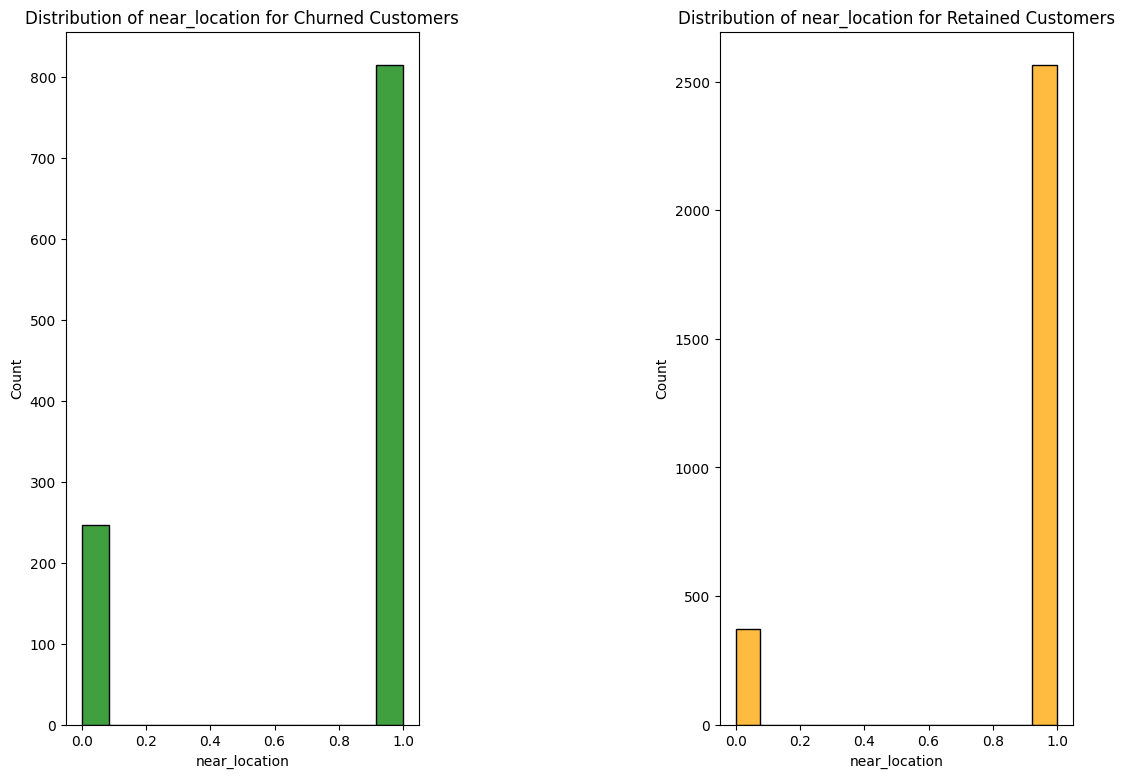

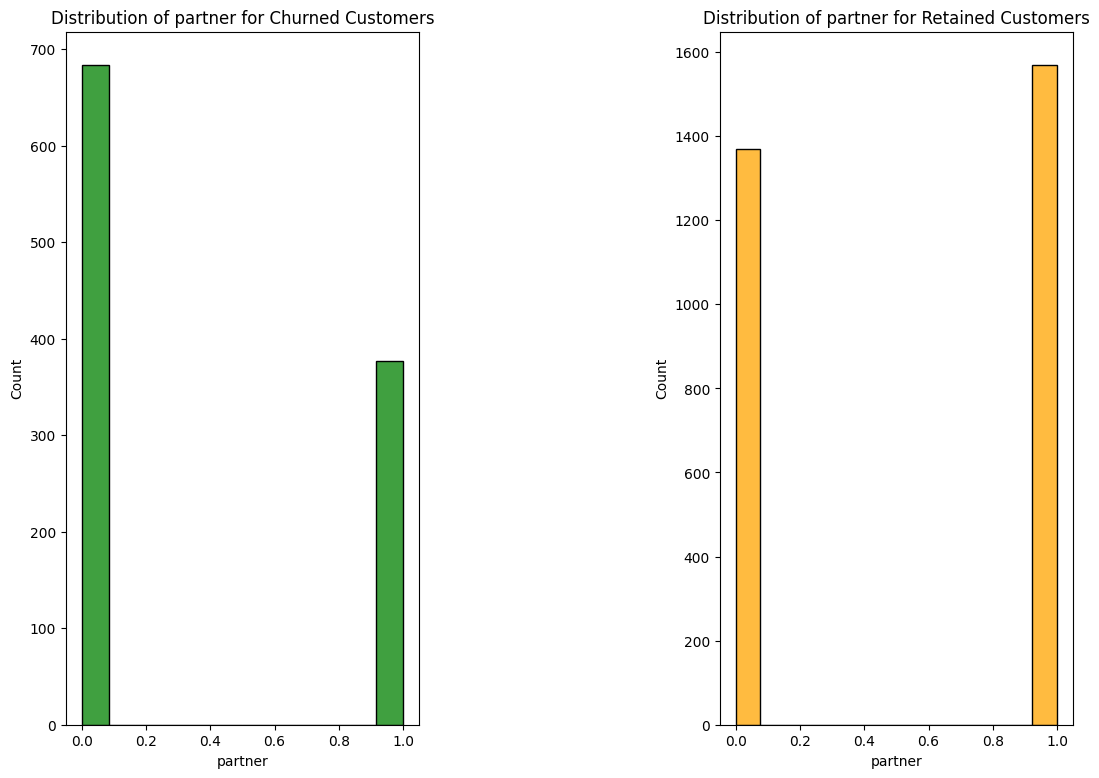

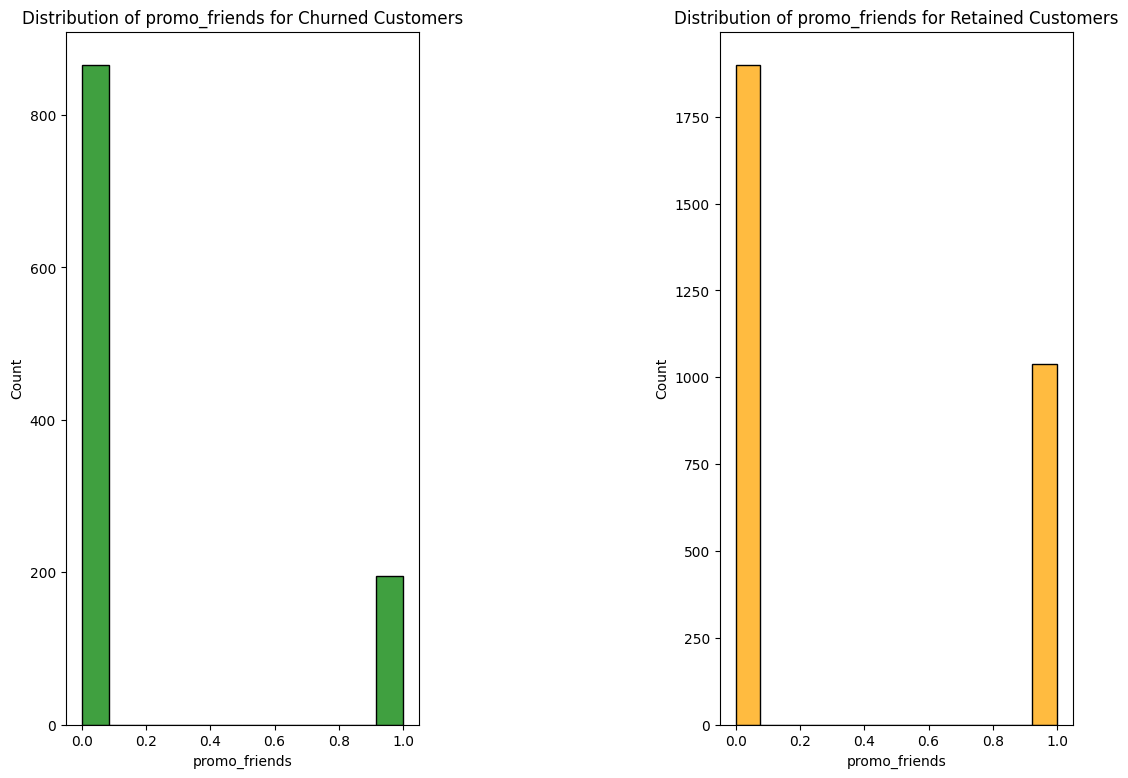

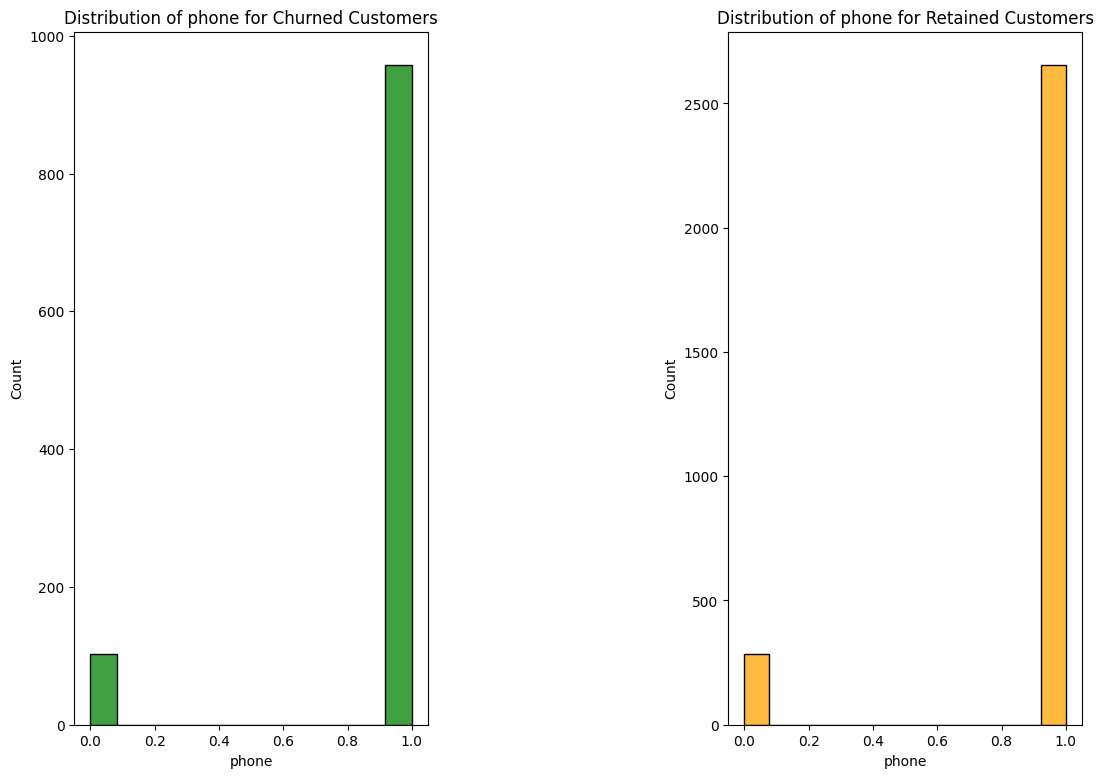

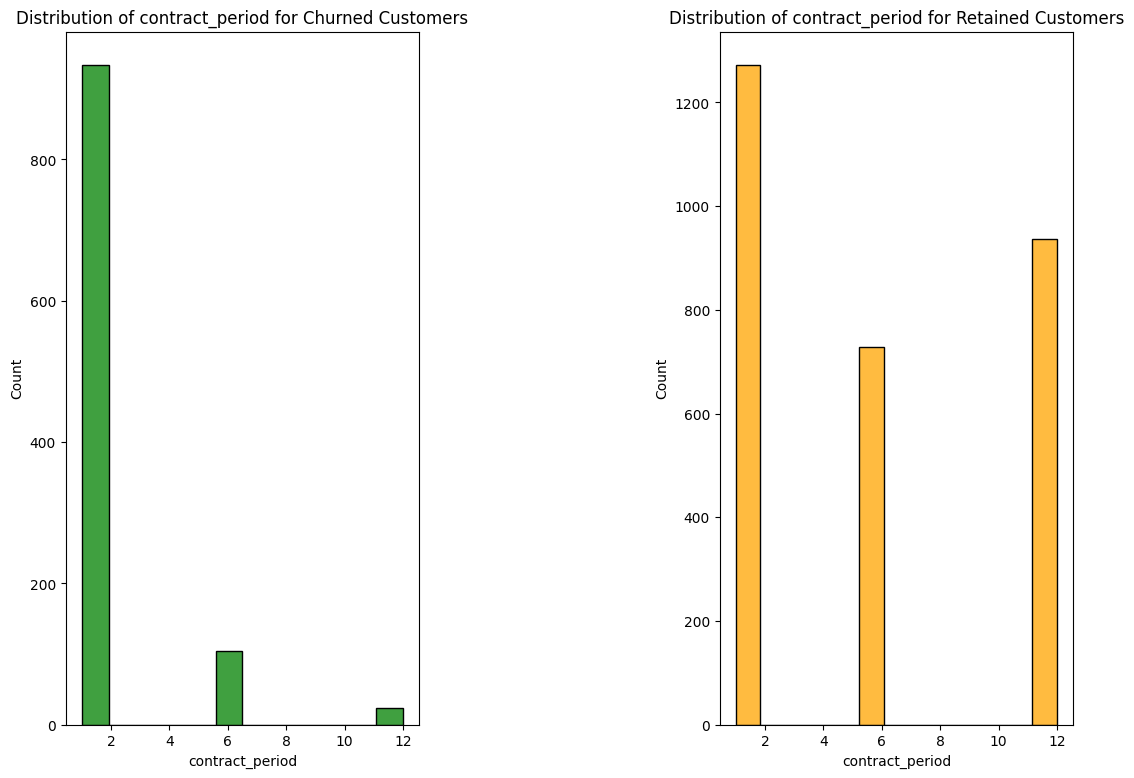

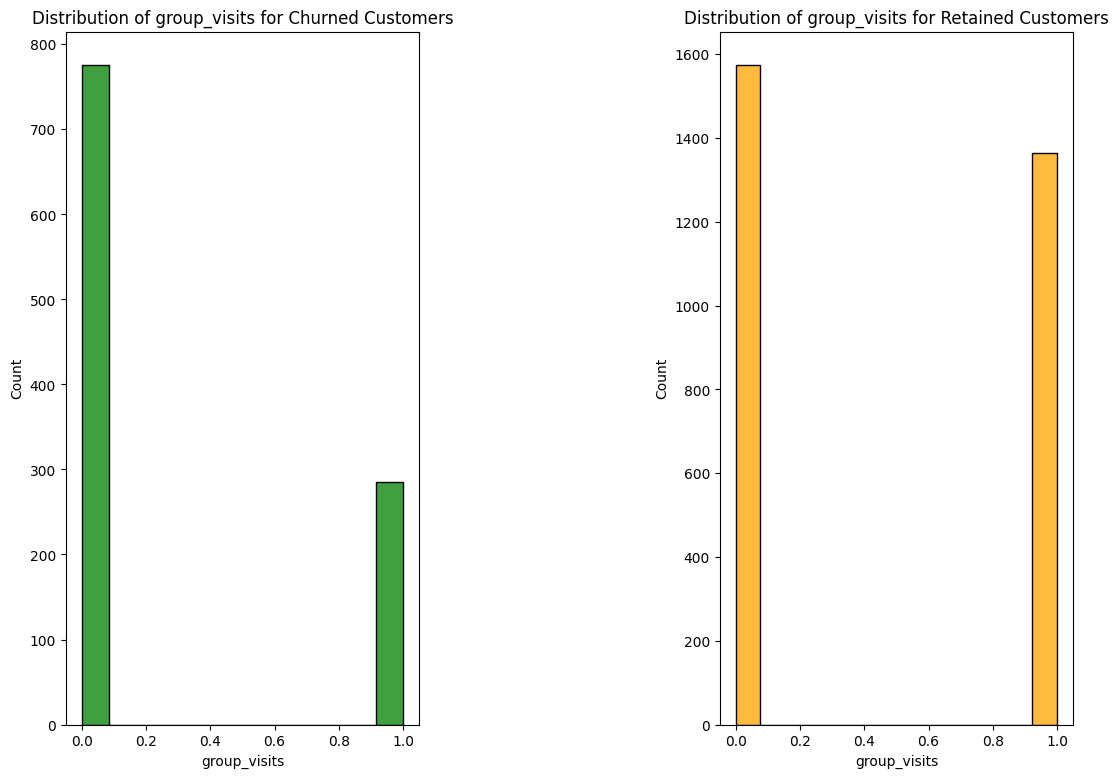

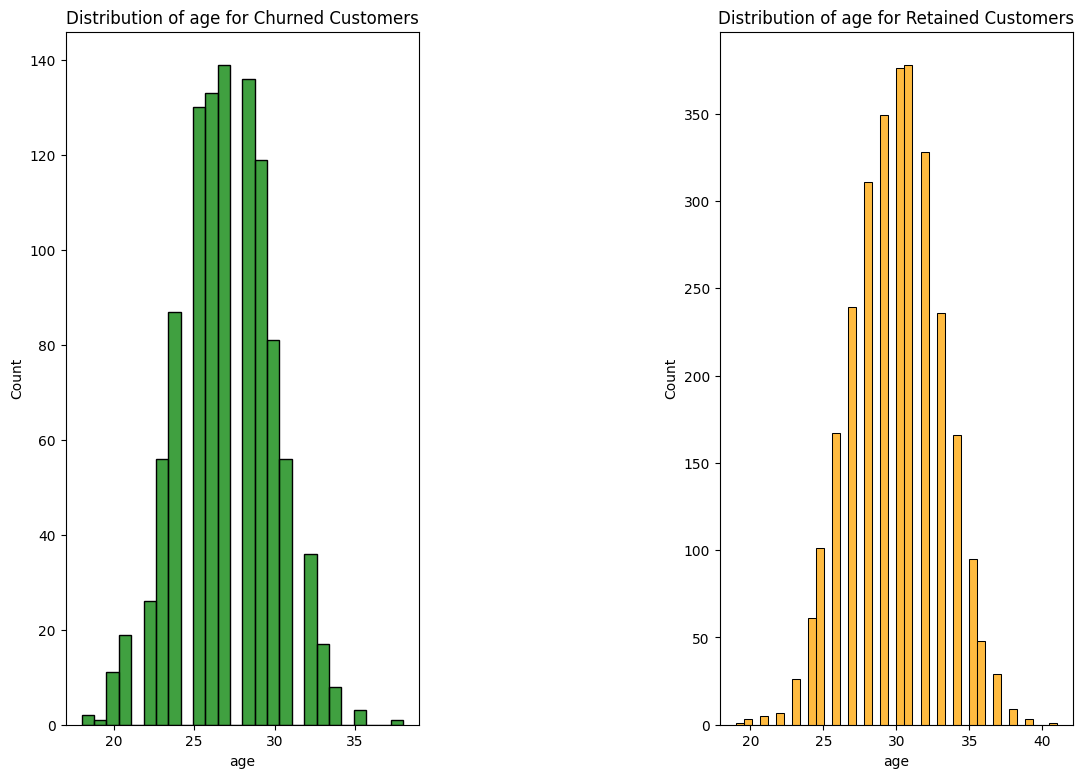

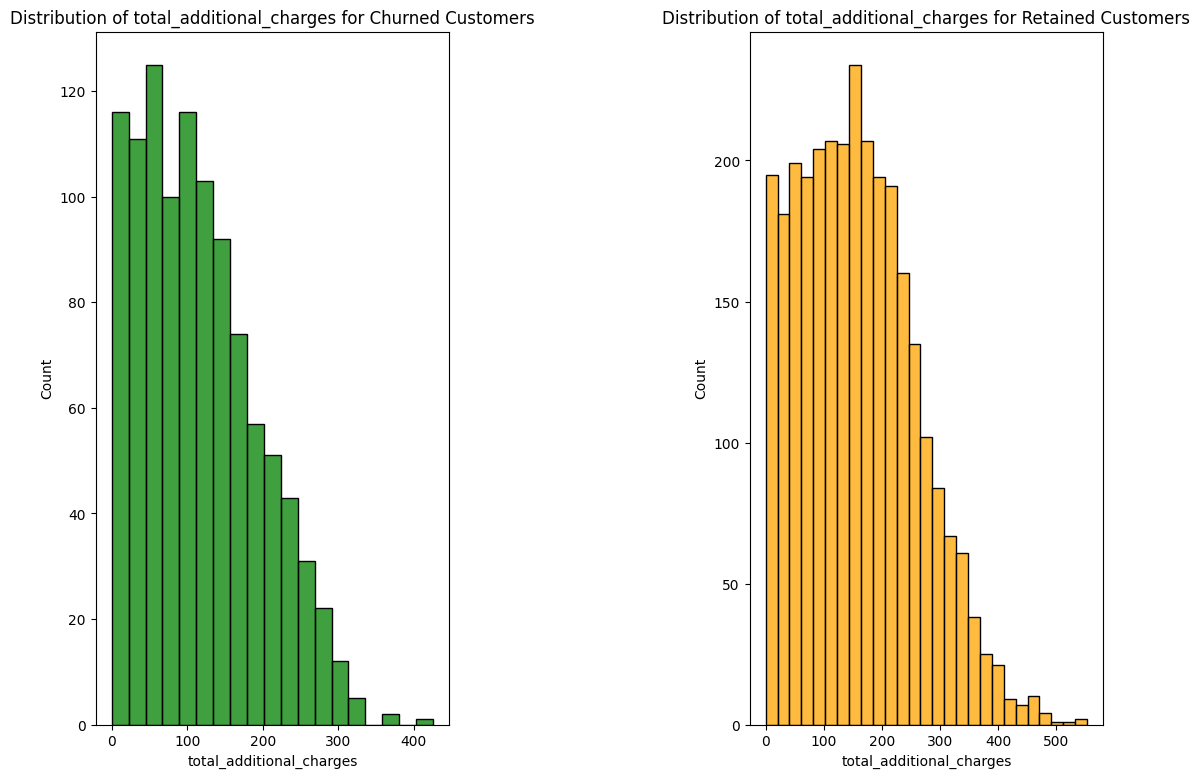

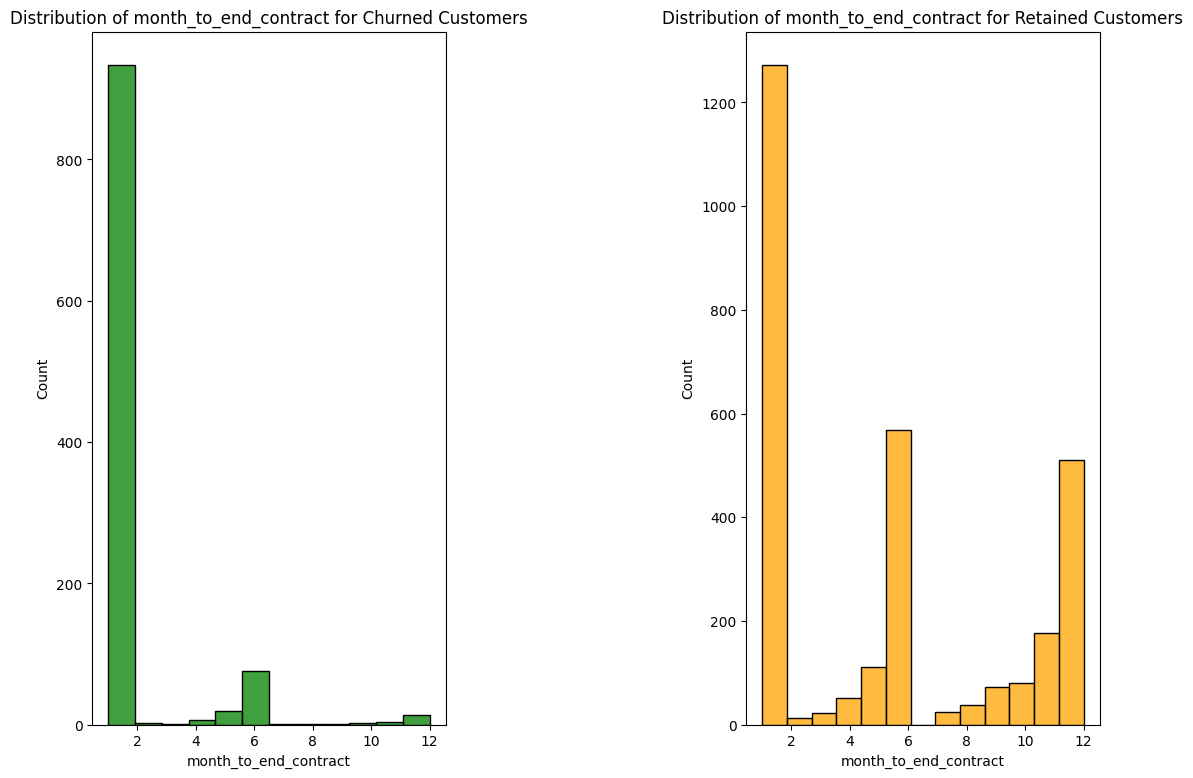

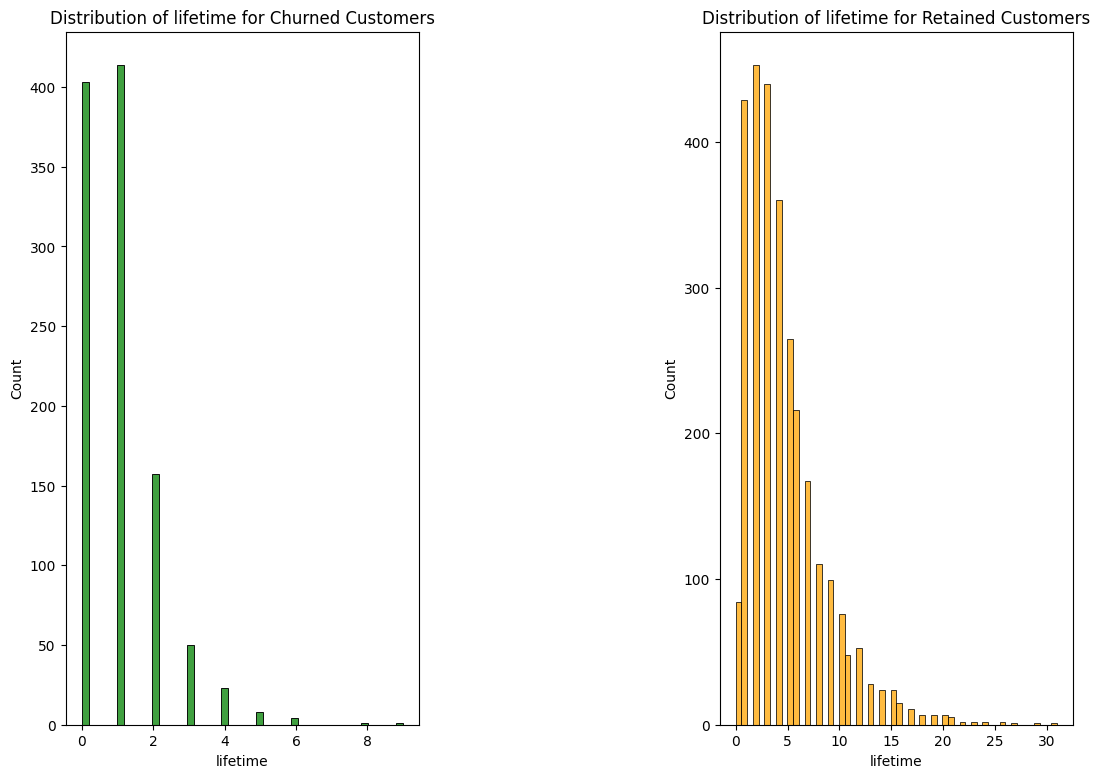

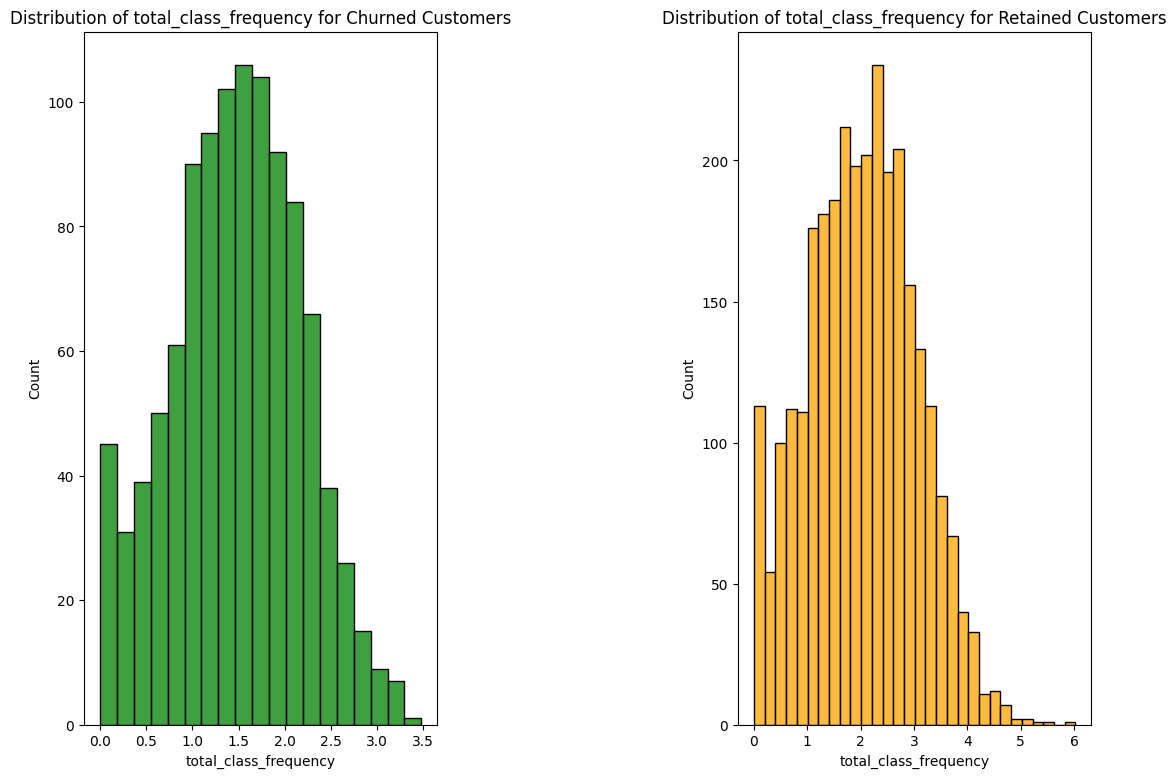

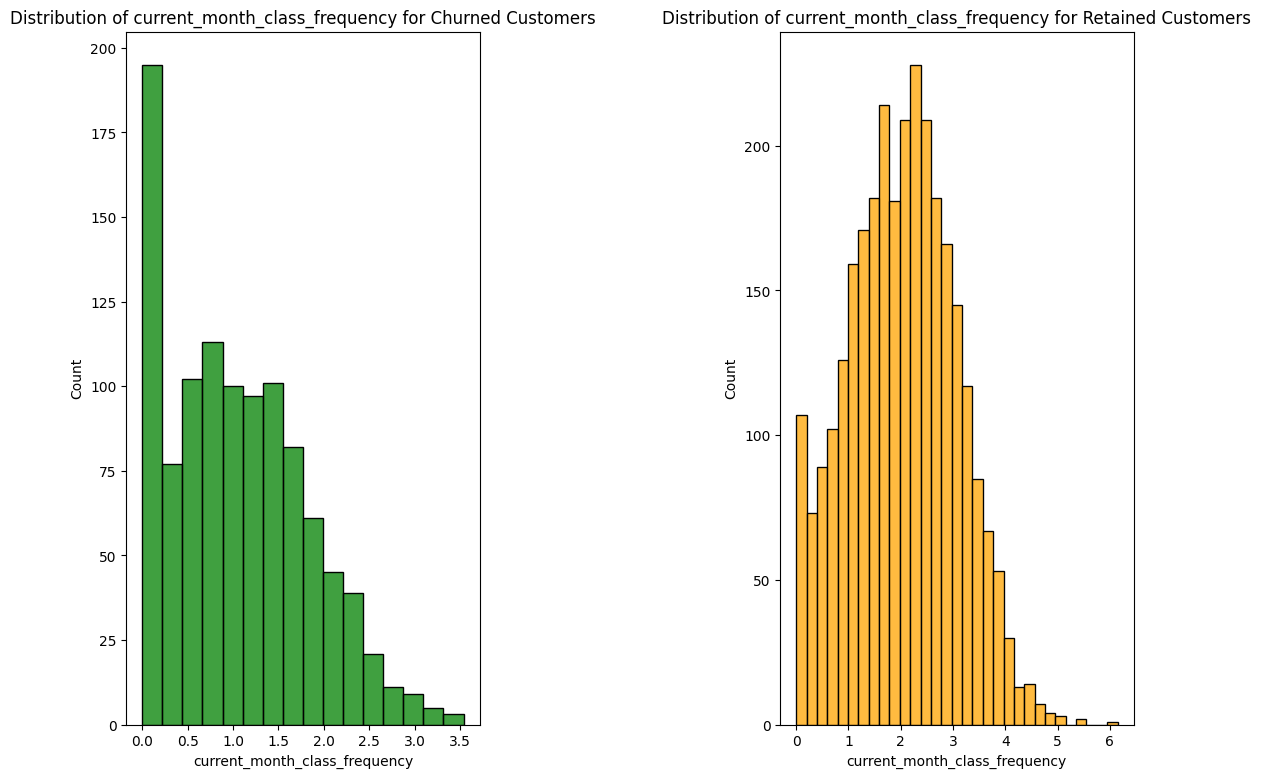

In [6]:
# Visualize distributions for each group (churn vs. no churn)
churned = data[data['churn'] == 1]
retained = data[data['churn'] == 0]

for var in data.columns:
    if var != 'churn':
        plt.figure(figsize=(13, 9))
        
        plt.subplot(1, 2, 1)
        sns.histplot(data=churned, x=var, kde=False, color='green', label='Churned')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'Distribution of {var} for Churned Customers')
        
        plt.subplot(1, 2, 2)
        sns.histplot(data=retained, x=var, kde=False, color='orange', label='Retained')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'Distribution of {var} for Retained Customers')
        
        plt.subplots_adjust(wspace=0.85)
        plt.show()


When analyzing the distributions of characteristics between customers who **churned** and those who **retained**, the following observations are made:

- For the characteristic of **proximity to the gym**, it is noticeable that most customers who remain live or work close to the gym, suggesting that convenience plays a crucial role in retention. In contrast, customers who churned show a less concentrated distribution in proximity to the gym.

- Regarding **association with companies and friend promotions**, retained customers have a higher proportion of membership in partner companies and registrations through friend promotions. This indicates that corporate relationships and personal recommendations positively influence retention. In contrast, these factors are less common among customers who churned.

- Concerning the **contract duration**, retained customers show a distribution with longer contracts compared to those who churned, who have a significant proportion of shorter contracts. This suggests that longer contracts are associated with a higher likelihood of retention.

- As for participation in **group sessions**, retained customers have higher participation compared to those who churned. This difference indicates that involvement in group activities may foster retention by creating a sense of community and commitment to the gym.

- Finally, in terms of **additional spending on gym services**, retained customers tend to spend more compared to those who churned. This suggests that customers who are more engaged with the gym's additional services and facilities have a higher probability of staying.

In summary, these observations highlight the importance of geographical proximity, participation in partner company programs and friend promotions, contract duration, involvement in group sessions, and spending on additional services as key factors influencing customer retention in the gym.


### Correlation Matrix and Removal of Highly Correlated Variables

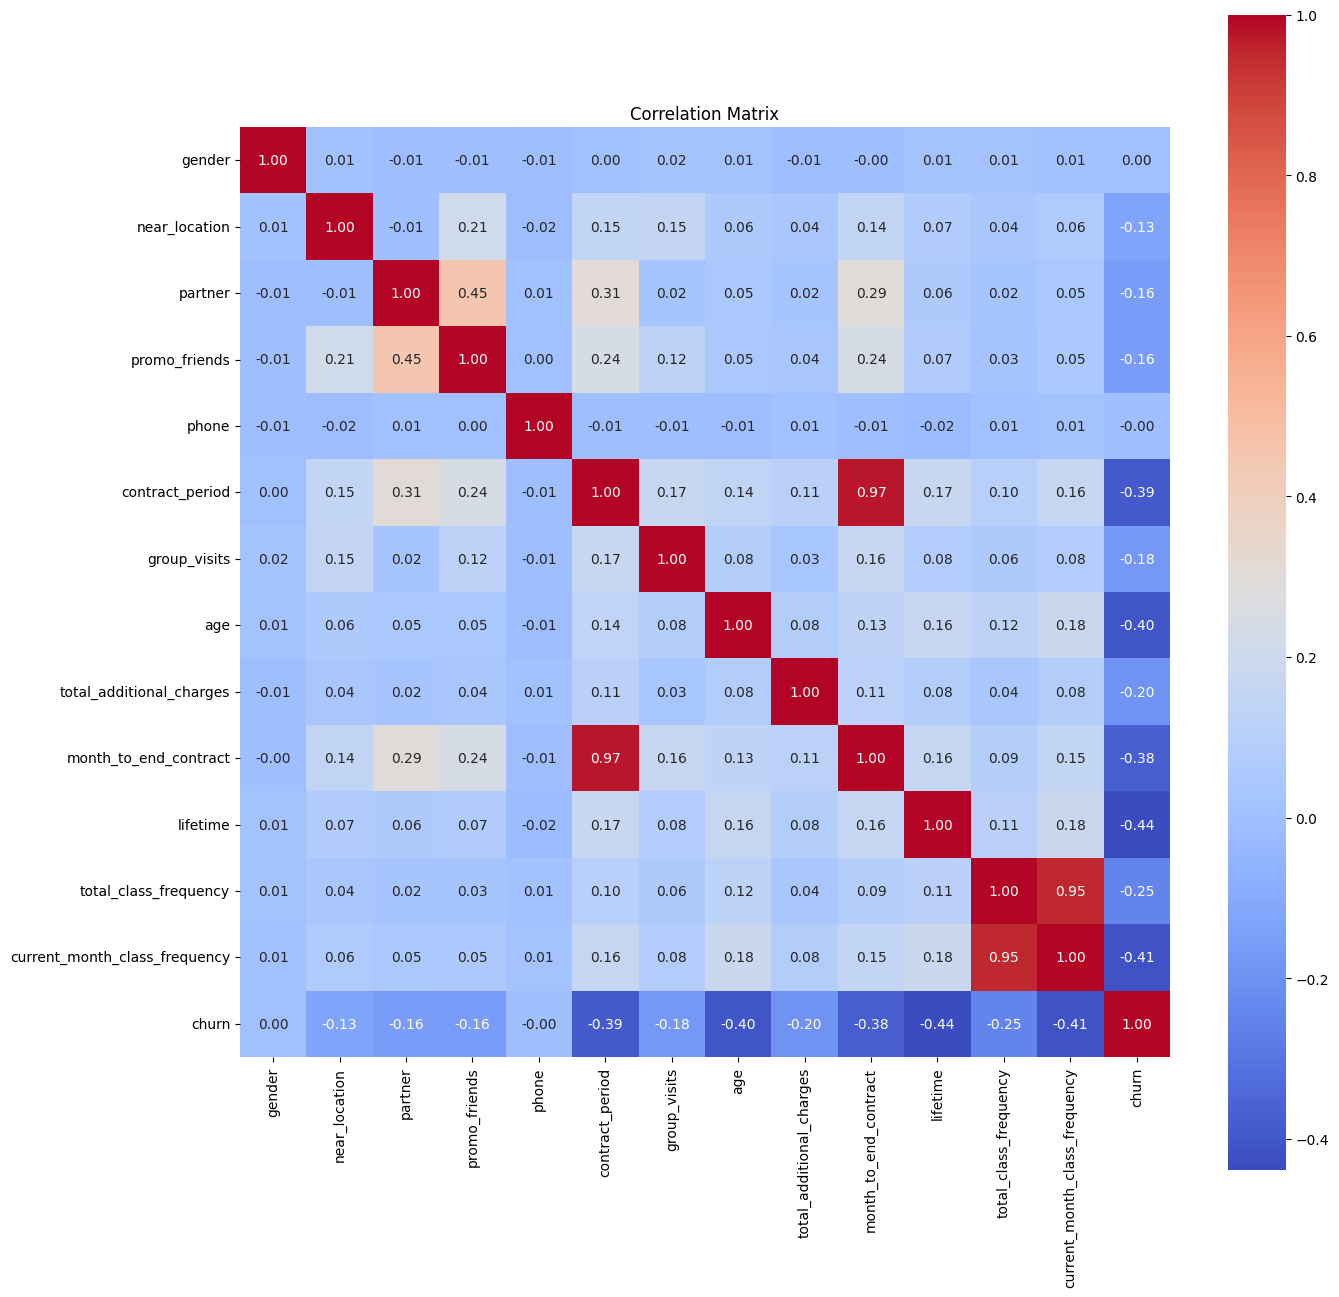

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age', 'total_additional_charges',
       'lifetime', 'total_class_frequency', 'churn'],
      dtype='object')


In [7]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Remove highly correlated columns if necessary
columns_to_drop = ['month_to_end_contract', 'current_month_class_frequency']
present_columns = [col for col in columns_to_drop if col in data.columns]
if present_columns:
    data = data.drop(columns=present_columns)
print(data.columns)

The correlation matrix reveals several relationships among the characteristics of Model Fitness customers. We observe a strong positive correlation between contract duration and the number of months remaining until the contract ends, which is expected since these are related measures. Additionally, we find a significant correlation between total class frequency and current month class frequency, indicating that customers who attend classes more frequently tend to maintain that regularity. These relationships are important for understanding the factors that could influence customer churn.


## Building a Binary Classification Model to Predict Customer Churn

### Splitting the Data into Training and Validation Sets

In [8]:
X = data.drop('churn', axis=1)
y = data['churn']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Model on the Training Set

In [9]:
# Initialize models
lr_model = LogisticRegression(random_state=0, max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Evaluation of Accuracy, Precision, and Recall for Both Models Using Validation Data

In [10]:
def print_all_metrics(y_true, y_pred, y_proba, title='Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# Predictions and probabilities for Logistic Regression
lr_predictions = lr_model.predict(X_val)
lr_probabilities = lr_model.predict_proba(X_val)[:, 1]
print_all_metrics(y_val, lr_predictions, lr_probabilities, title='Metrics for Logistic Regression:')

print("\n" + "-"*50 + "\n")

# Predictions and probabilities for Random Forest
rf_predictions = rf_model.predict(X_val)
rf_probabilities = rf_model.predict_proba(X_val)[:, 1]
print_all_metrics(y_val, rf_predictions, rf_probabilities, title='Metrics for Random Forest:')

Metrics for Logistic Regression:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.81

--------------------------------------------------

Metrics for Random Forest:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77


Both models, Logistic Regression and Random Forest, demonstrated solid performance in predicting customer churn at Model Fitness. The Logistic Regression model achieved an accuracy of 90%, indicating that it correctly predicted most of the time. Additionally, it had a precision of 78%, meaning that when it predicted customer churn, it was generally correct. The recall was 81%, capturing a good proportion of the customers who actually churned. On the other hand, the Random Forest model achieved a slightly lower accuracy of 89%, with similar precision and recall to the Logistic Regression model (78% and 77%, respectively). In conclusion, both models showed satisfactory performance, with Logistic Regression being slightly superior in terms of accuracy and recall.

## Creation of User Clusters

### Data Standardization


In [11]:
# Standardization of the data
sc = StandardScaler()
x_sc = sc.fit_transform(data)

### Dendrogram Visualization

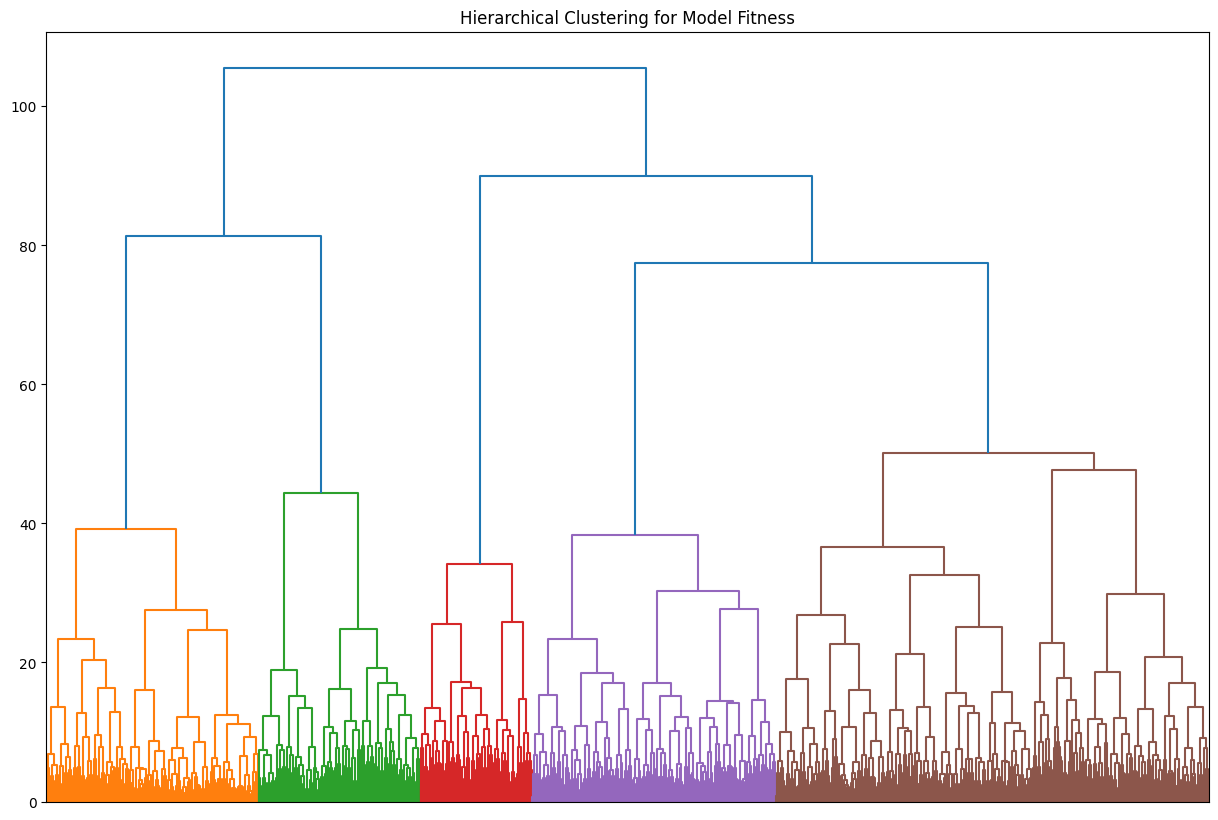

In [12]:
# Calculate the hierarchical linkage
linked = linkage(x_sc, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering for Model Fitness')
plt.show()


Hierarchical clustering applied to Model Fitness data reveals distinct groups of users based on similar characteristics. The main conclusions are as follows:

1. **Data Standardization:** We utilized data standardization to ensure that all features were on the same scale, thus facilitating comparison and clustering.

2. **Customized Dendrogram:** The generated dendrogram displays the hierarchical structure of the clusters. The colors were customized to highlight different levels of grouping, allowing for a clear visualization of how users are clustered based on similarities in their characteristics.

3. **Number of Clusters:** We decided to use a clustering method that divided the users into 5 distinct clusters. Each cluster shows user profiles with specific characteristics in terms of gender, proximity to the gym, participation in partner programs, among others.

4. **Cluster Feature Analysis:** We observed that:
   - **Cluster 2** has the largest number of users and shows lower average values across most features, yet surprisingly has the highest churn rate.
   - **Cluster 4** stands out for having the highest values in all features and the lowest churn rate, indicating highly engaged customers.
   - **Cluster 0** exhibits an extremely low churn rate, suggesting notable loyalty among its members.
   
5. **Implications for Retention Strategy:** The identified clusters provide valuable insights for Model Fitness's retention strategy. It is crucial to focus resources on retaining customers from clusters with higher churn risk (such as Cluster 2 and Cluster 1) while strengthening relationships with highly engaged customers in clusters like Cluster 4.

This hierarchical clustering analysis offers a solid foundation for customer segmentation and the formulation of personalized strategies that could improve retention and customer satisfaction at Model Fitness.

### Training the Clustering Model with the K-Means Algorithm

In [13]:
# Training the Clustering Model
km = KMeans(n_clusters=5)
# Predict cluster for each observation
labels = km.fit_predict(x_sc)

# Save the cluster labels in the dataset
data['cluster_km'] = labels

### Analysis of the Mean Feature Values for Each Cluster

In [14]:
# Mean Feature Values Statistics by Cluster
mean_features = data.groupby('cluster_km').mean().T
display(mean_features)

cluster_km,0,1,2,3,4
gender,0.513109,0.500829,0.503205,0.522936,0.503509
near_location,1.000000,0.000000,0.992521,0.999083,0.985965
partner,0.330836,0.482587,0.916667,0.161468,0.626316
promo_friends,0.217228,0.071310,1.000000,0.074312,0.000000
phone,0.900125,0.912106,0.903846,0.902752,0.900000
contract_period,1.682896,2.887231,7.827991,2.068807,10.621053
group_visits,0.289638,0.225539,0.544872,0.450459,0.491228
age,26.922597,28.656716,29.950855,30.055963,29.994737
total_additional_charges,114.095697,135.916291,159.006129,157.510111,164.756100
lifetime,0.965044,2.976783,4.708333,4.833945,4.657895


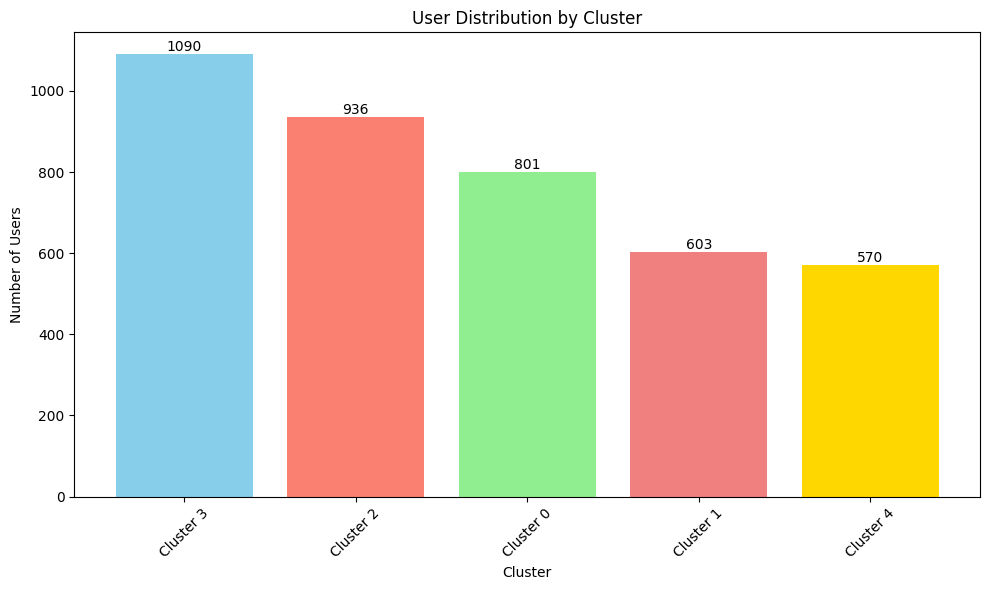

In [15]:
# Cluster Frequency Data
cluster_counts = data['cluster_km'].value_counts().sort_values(ascending=False)
cluster_labels = [f'Cluster {i}' for i in cluster_counts.index]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_counts, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'gold'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('User Distribution by Cluster')

# Display values on the bars
for bar, count in zip(bars, cluster_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count, 
             ha='center', va='bottom', fontsize=10)

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

User segmentation through cluster analysis revealed five distinct groups in Model Fitness. Each cluster displays unique characteristics that could be key for retention strategies and service improvements. For example, Cluster 3 stands out as the largest and shows the lowest churn rate, suggesting high loyalty among its members. In contrast, Cluster 0 exhibits a high propensity for cancellation, indicating the potential need for specific strategies to retain these customers. This analysis provides a detailed view of customer profiles and guides towards personalized actions to strengthen loyalty and reduce churn.

### Visualization of Feature Distributions by Cluster

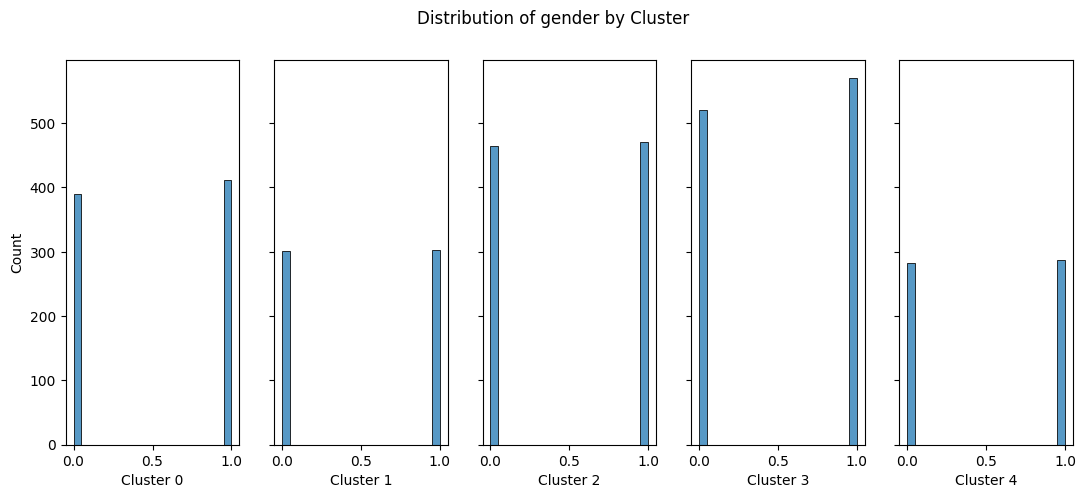

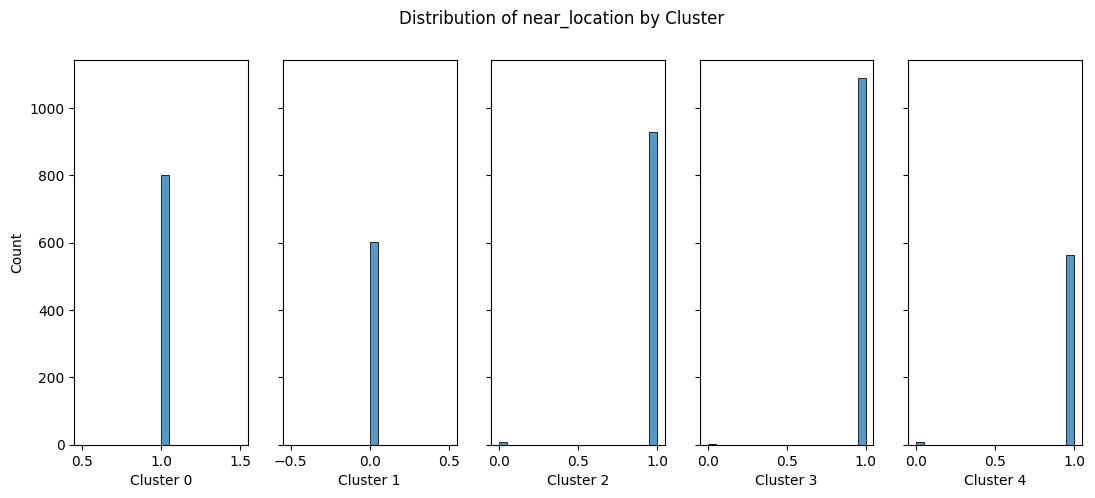

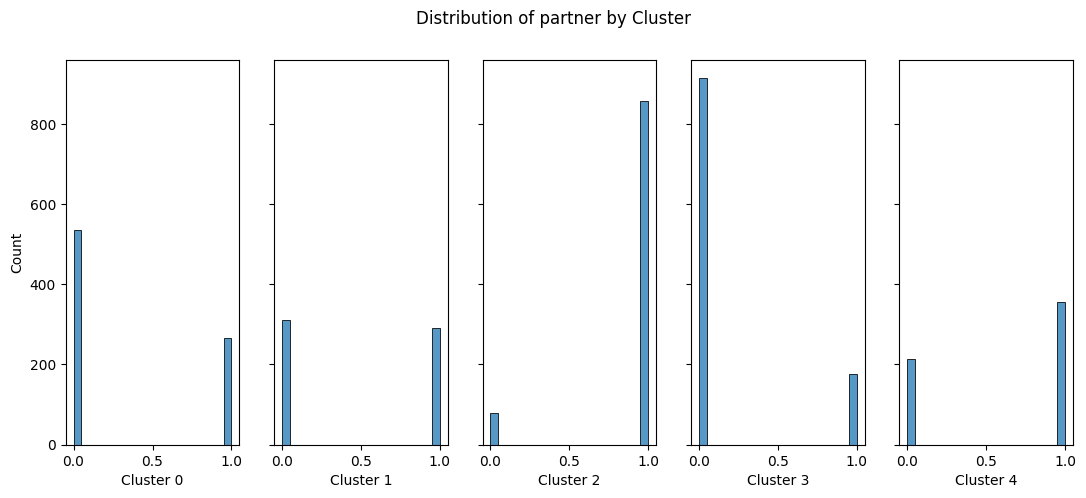

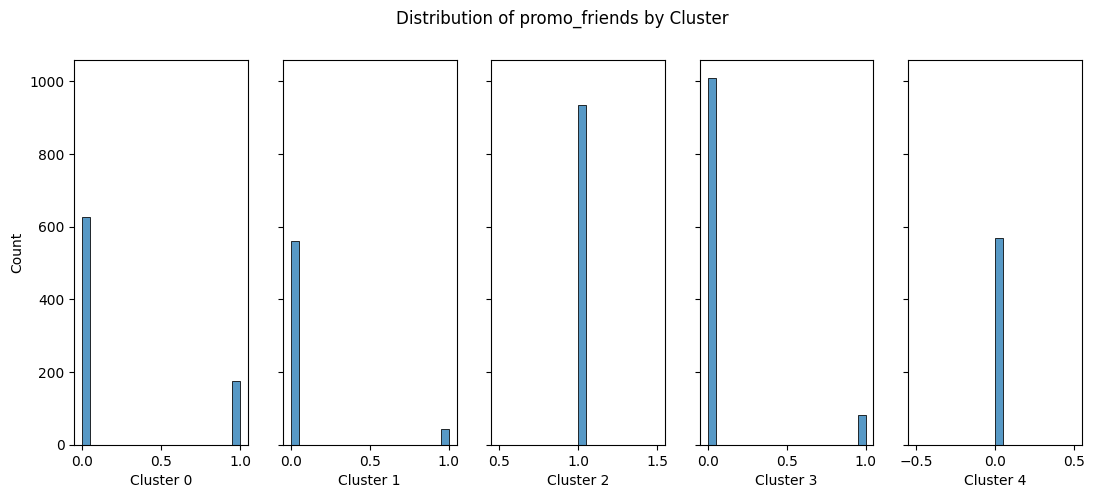

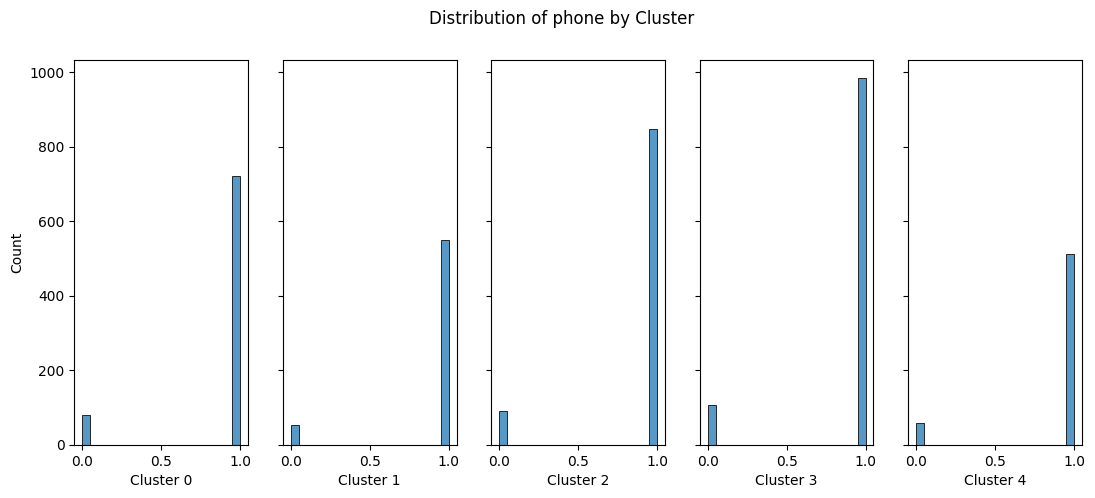

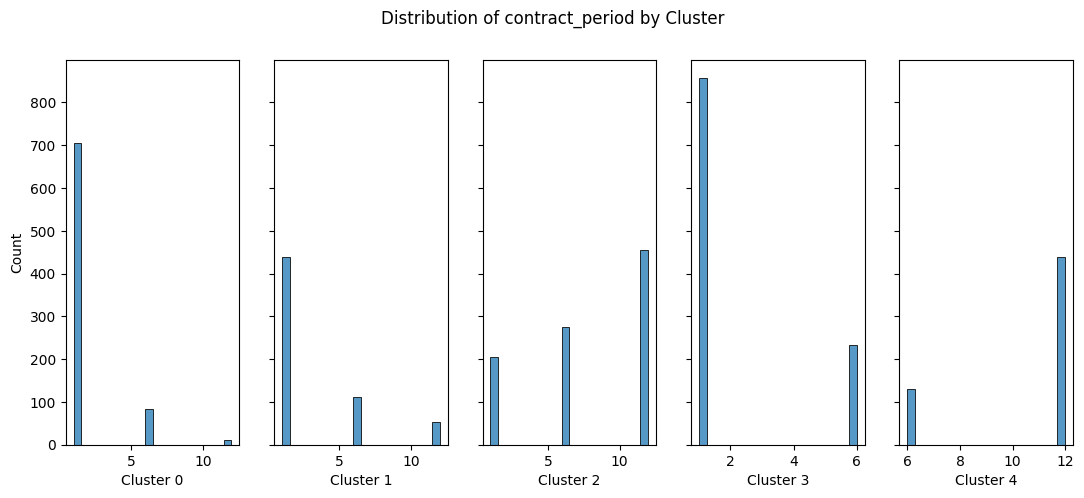

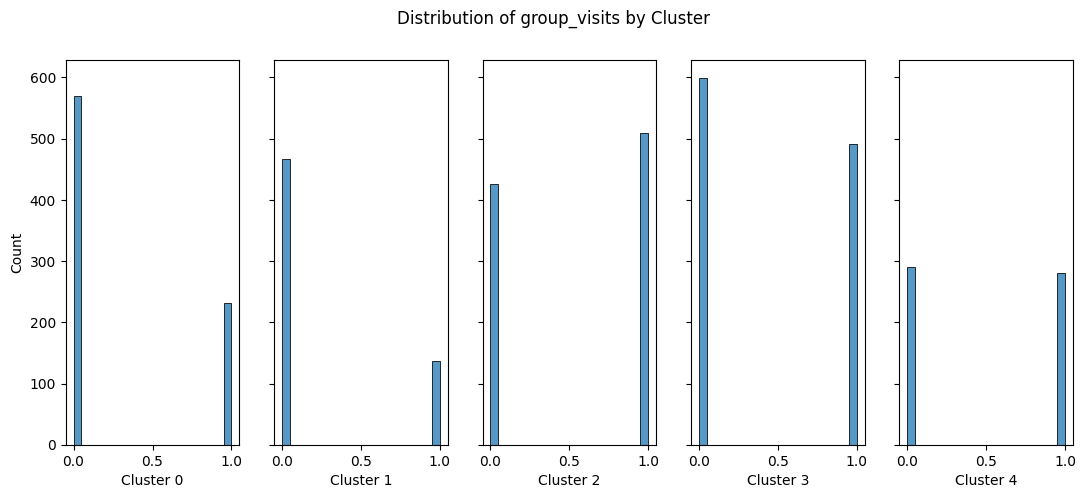

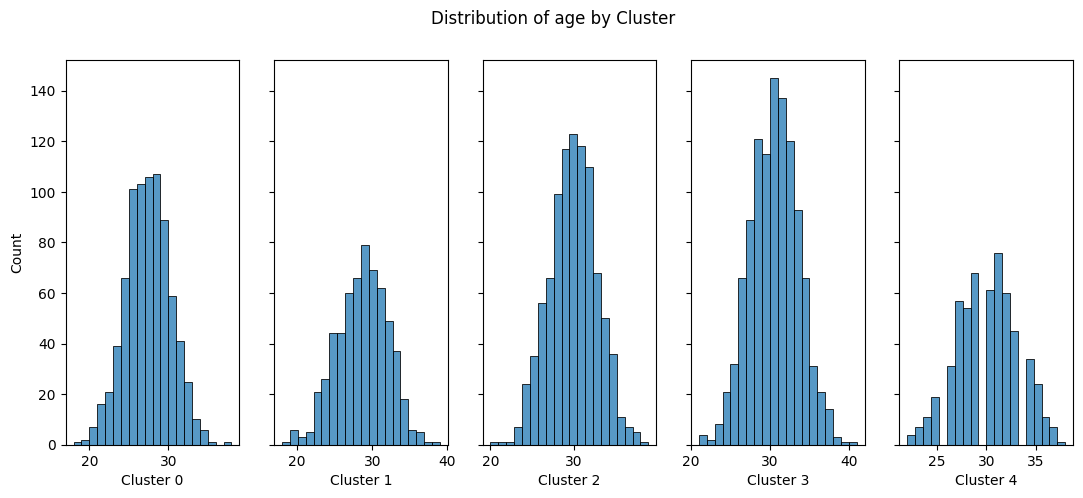

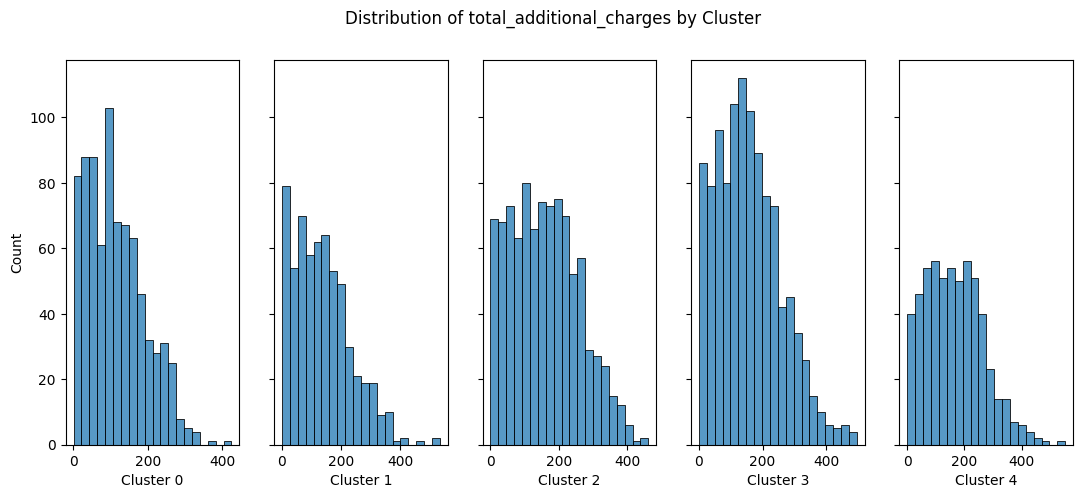

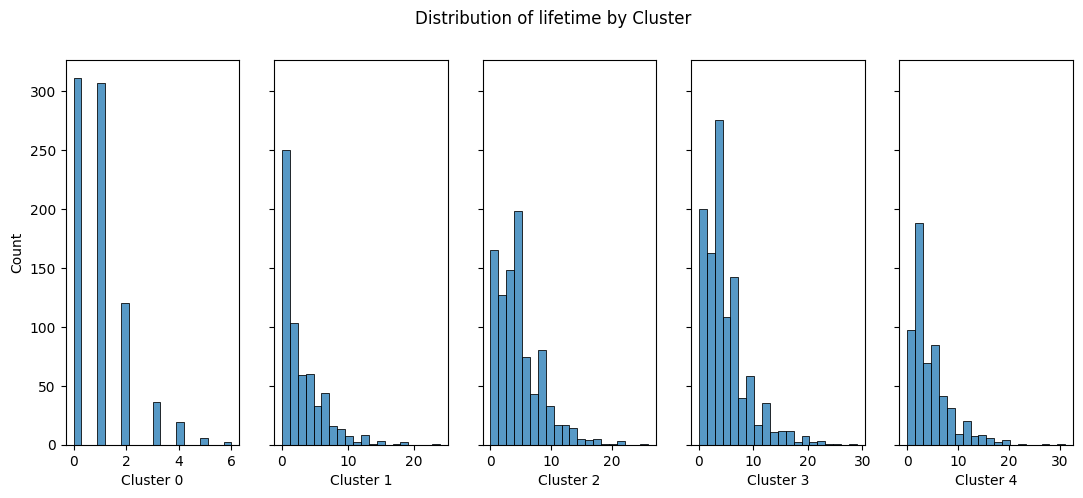

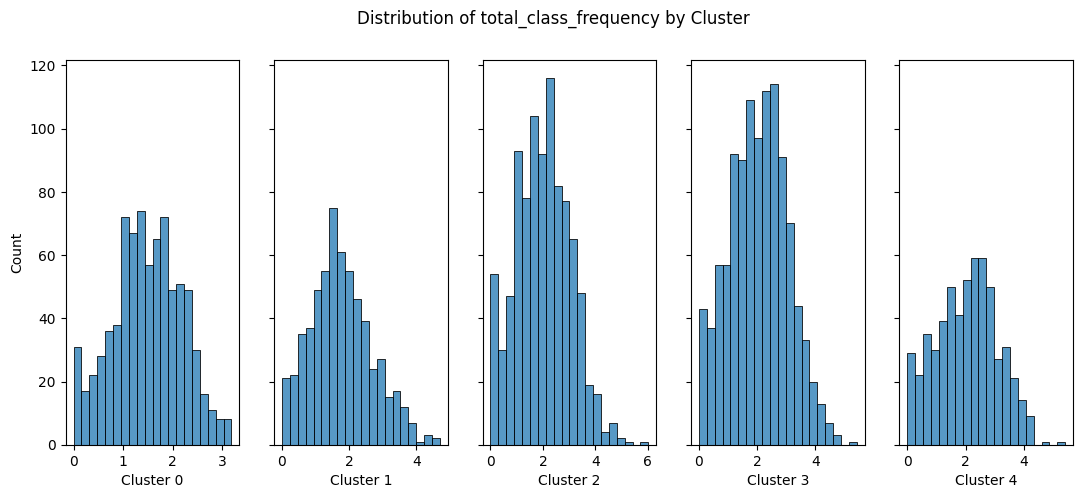

In [16]:
# Get the features from the DataFrame
features = data.drop(['churn', 'cluster_km'], axis=1).columns

# Set up the visualization of feature distributions by cluster with bar plots
for feature in features:
    fig, axes = plt.subplots(1, 5, sharey=True, figsize=(13, 5))
    
    for i, cluster in enumerate(range(5)):
        ax = axes[i]
        cluster_data = data[data['cluster_km'] == cluster]
        sns.histplot(data=cluster_data, x=feature, bins=20, ax=ax)
        ax.set_xlabel(f'Cluster {cluster}')
    
    fig.suptitle(f'Distribution of {feature} by Cluster')
    plt.show()

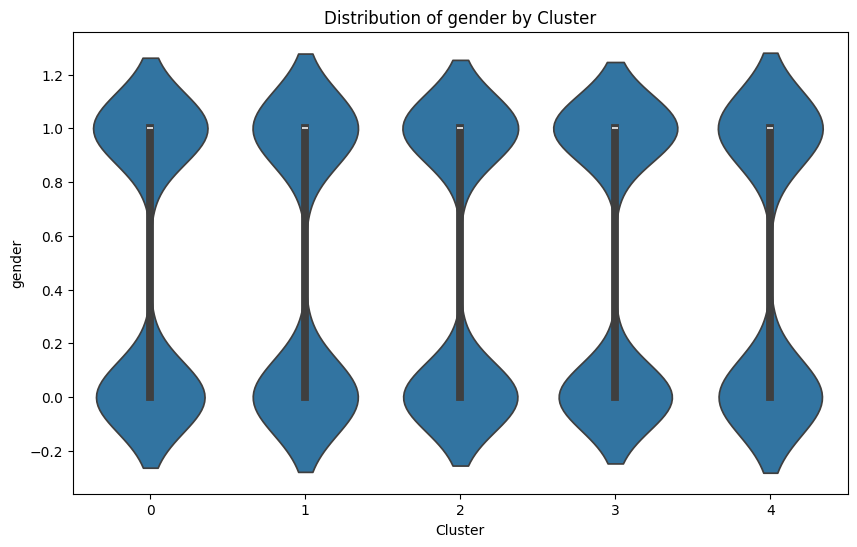

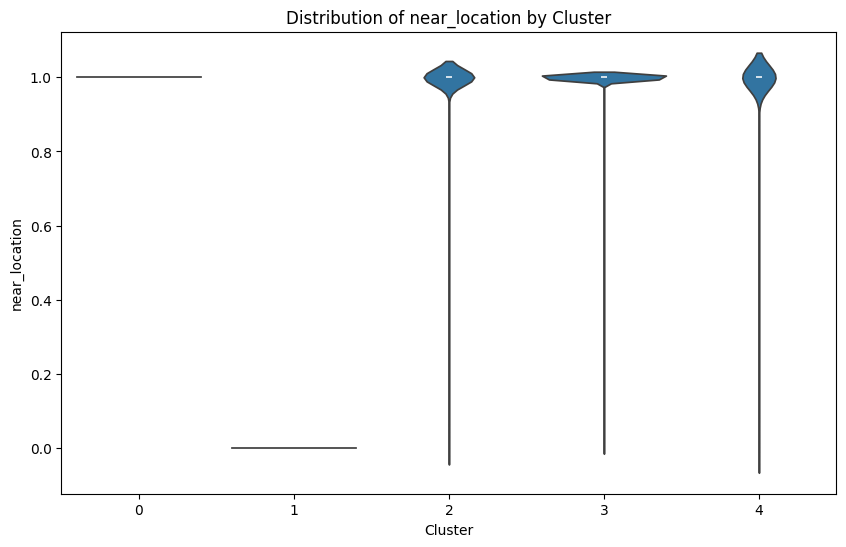

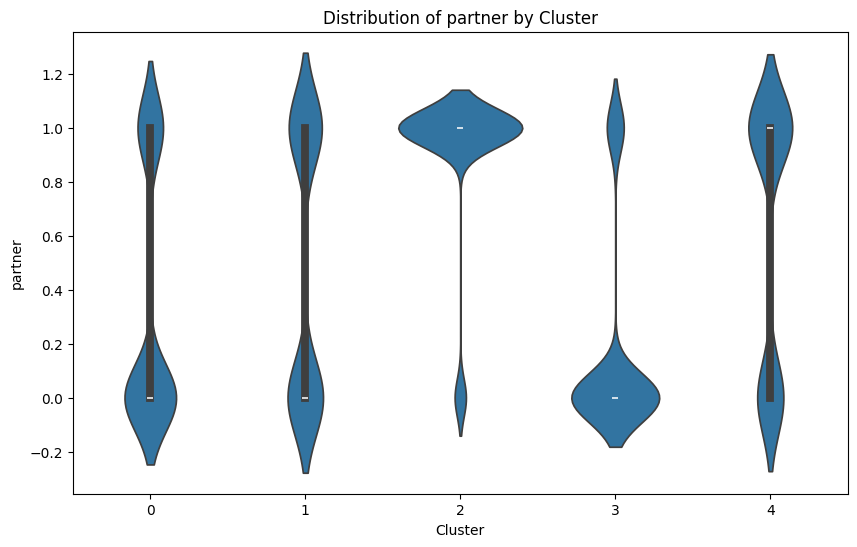

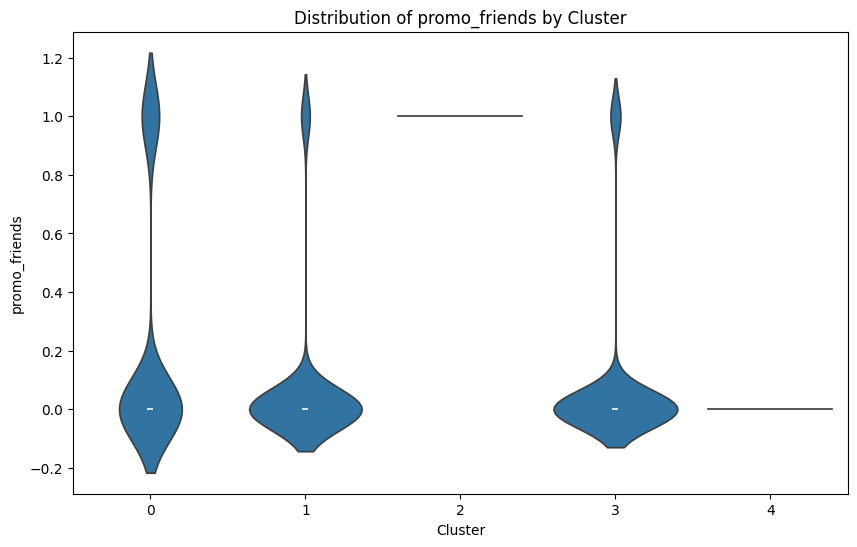

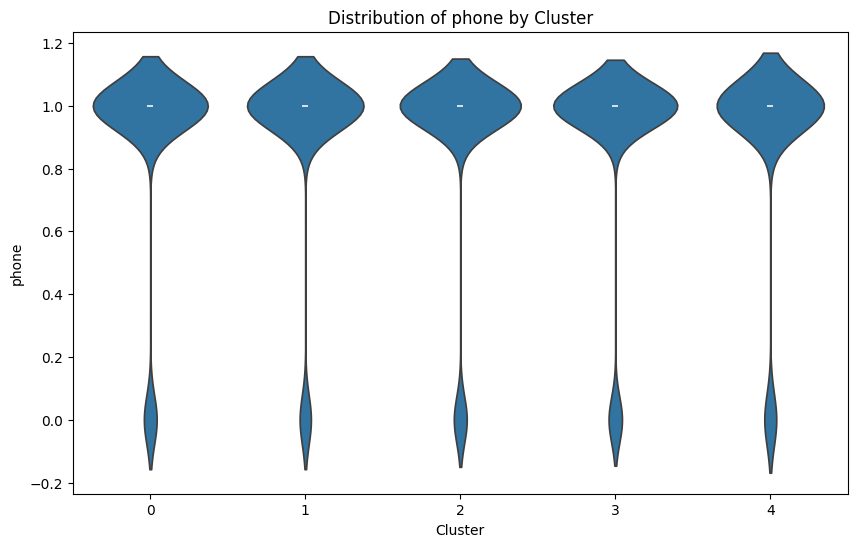

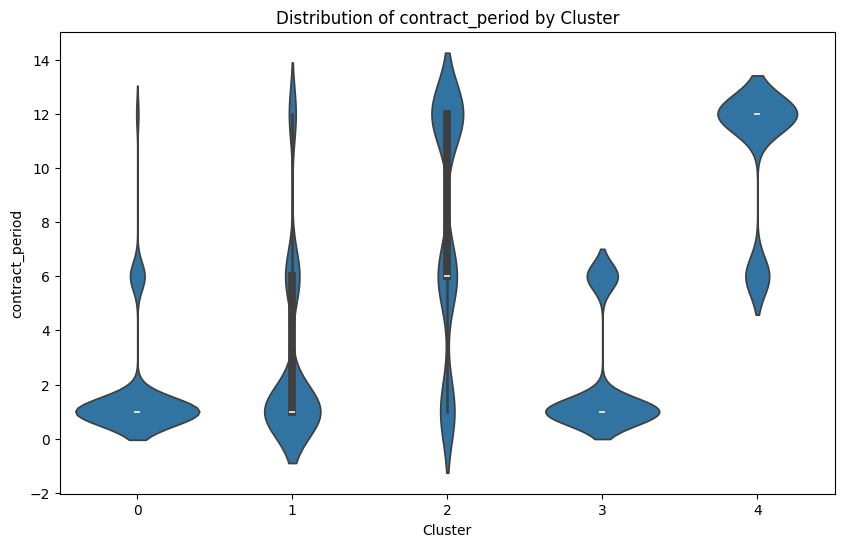

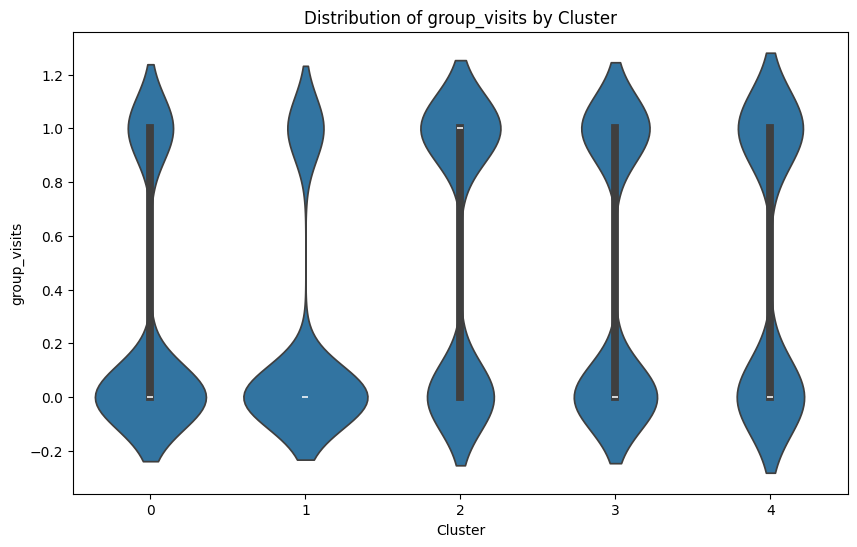

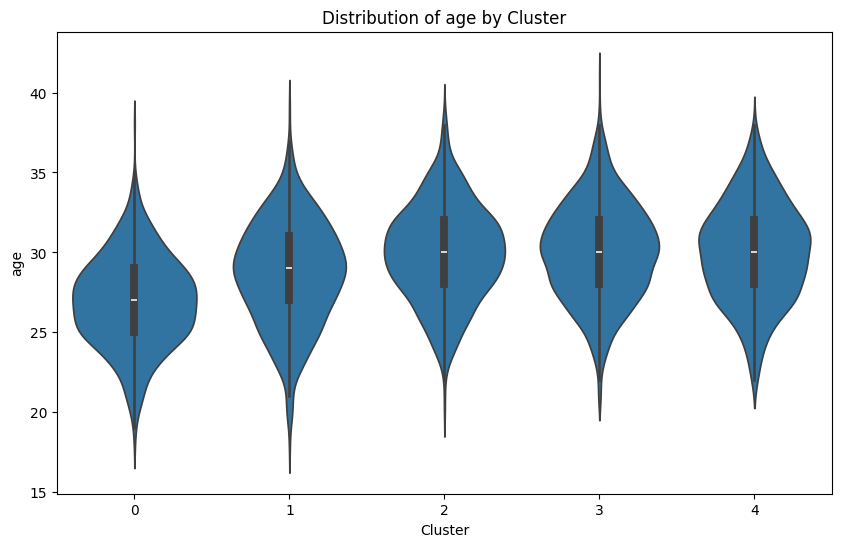

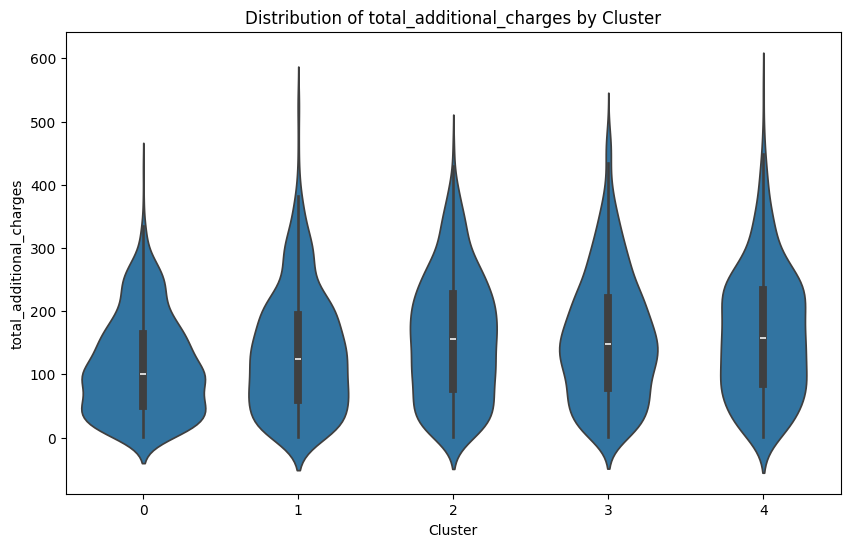

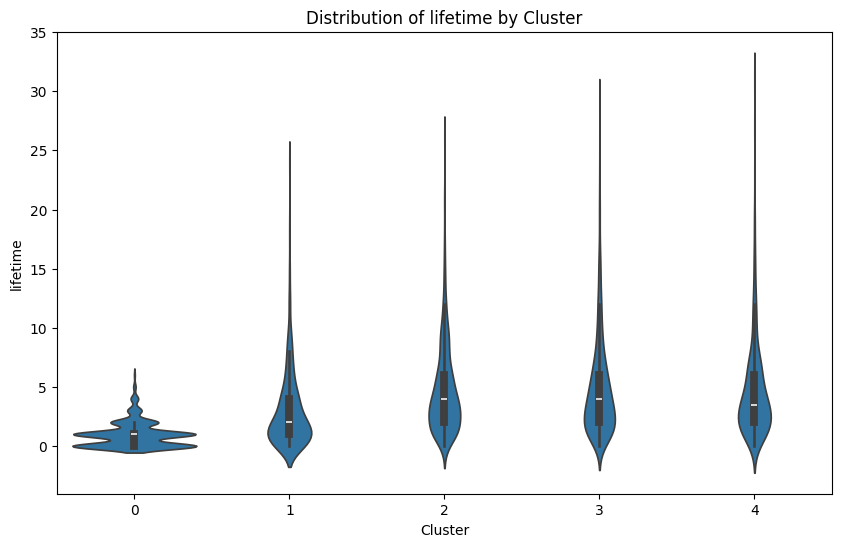

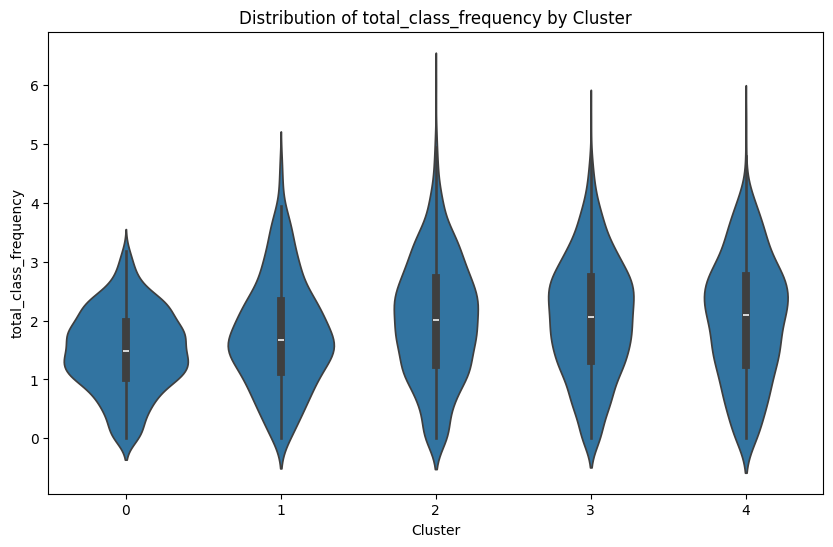

In [17]:
# Set up the visualization of feature distributions by cluster using violin plots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='cluster_km', y=feature)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

Based on the feature distributions by cluster observed in the histograms and violin plots, distinctive patterns can be identified among the gym user groups.

Regarding **proximity to the gym**, Cluster 0 stands out for having a high proportion of users who do not live nearby, while Clusters 1, 2, 3, and 4 show a higher concentration of users residing close to the gym. The violin plots reveal that the distribution within these clusters is also quite dense, indicating a strong tendency for these users to live near the gym.

Concerning **employees as partners**, Cluster 1 shows the highest proportion of users in this category, in contrast to Cluster 2, which has the lowest. The violin plots indicate that although Cluster 1 has a high proportion, the distribution is quite broad, suggesting significant variability within the cluster.

In terms of **enrollment through friend promotions**, Cluster 1 stands out with the majority of users acquired this way, while Clusters 0, 2, 3, and 4 show less participation in these promotions. The violin plots confirm that Cluster 1 not only has a high proportion but also a dense distribution around this value.

Regarding **contract duration**, Cluster 3 is characterized by having a high concentration of short-term contracts (less than 2 months), while Clusters 1 and 4 show a higher proportion of long-term contracts (more than 6 months). The violin plots reflect these differences and show the variability within each cluster, with a wider spread in long-term contracts.

In terms of **group visit frequency**, Cluster 1 shows the highest participation, in contrast to Cluster 2, which shows the lowest. The visualization in violin plots provides a detailed view of the distribution of group visit frequency, indicating consistent patterns within each cluster.

The **age distribution** shows minor variations between clusters, with a slight inclination towards younger ages in Cluster 2 and older ages in Cluster 4. The violin plots detail the age dispersion, revealing greater variability in certain clusters.

In terms of **additional spending**, Cluster 4 stands out for having the highest average additional charges, while Cluster 2 shows the lowest. The violin plots indicate considerable dispersion in additional spending within each cluster, suggesting different levels of financial commitment.

Regarding **tenure**, Cluster 4 exhibits the highest average tenure, in contrast to Cluster 2, which has the lowest. The variability in tenure is clearly visible in the violin plots, showing significant differences between clusters.

Concerning **class frequency**, Cluster 4 shows the highest average attendance, while Cluster 2 has the lowest. The violin plots allow observation of the distributions of class frequency within each cluster, highlighting different usage patterns.

Finally, the **churn rate** reveals that Cluster 0 has the lowest rate, Cluster 3 a moderate rate, and Clusters 1 and 4 present the highest rates. This trend is confirmed by both the mean values and the distributions shown in the violin plots.

These conclusions provide a deep understanding of the behaviors and unique characteristics of each gym user segment, allowing for targeted strategies to retain customers and improve overall customer satisfaction. The combination of bar charts and violin plots offers a detailed perspective, capturing both general trends and variability within each cluster.

### Calculation of Churn Rate for Each Cluster

cluster_km
0    0.997503
1    0.407960
2    0.011752
4    0.005263
3    0.001835
Name: churn, dtype: float64


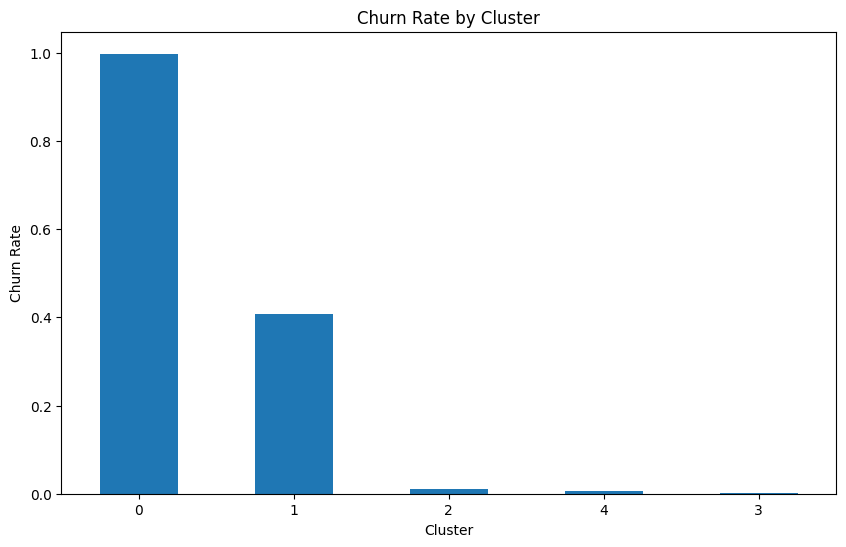

In [18]:
# Calculation of churn rate for each cluster
churn_rate = data.groupby('cluster_km')['churn'].mean().sort_values(ascending=False)
print(churn_rate)

# Visualization of churn rate by cluster
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

The detailed analysis of churn rate by cluster reveals significant variations in customer retention among the identified groups. Cluster 2 shows the highest churn rate, reaching approximately 49.2%, indicating a high likelihood of attrition among its members. In contrast, Cluster 4 exhibits the lowest churn rate, with only about 1.3% of customers leaving the gym, suggesting greater loyalty and retention within this group. This visualization provides crucial insights for directing targeted customer retention strategies, tailored to the unique needs and behaviors of each identified segment.

## Conclusions and Recommendations for Improving Customer Retention at the Gym

After a thorough analysis of the gym's customer data, we have identified several critical factors that significantly influence customer retention. Among the most notable findings, we observed that geographic proximity to the gym plays a crucial role, with local users showing a lower propensity to churn. Additionally, those who join the gym through friend promotions tend to demonstrate greater loyalty in certain clusters.

Based on these findings, we propose a series of strategic recommendations specifically tailored to the gym's needs and environment:

**Focus on Strategic Partnerships:**
To encourage retention, we recommend expanding and strengthening partnerships with local and corporate companies. This will allow the gym to offer exclusive benefits to employees, such as membership discounts or preferential access to facilities and special classes, thereby incentivizing affiliation and extending gym membership duration.

**Personalization of Experiences:**
Implement highly personalized customer service programs using behavioral data and preferences. This could include personalized training and nutrition recommendations based on each member's activity history, thereby enhancing the individual experience and strengthening the emotional connection with the gym.

**Technological Innovation:**
Introduce advanced technologies, such as mobile apps with personalized fitness goal tracking and progress features, as well as automated notifications about events and promotions. These tools will not only improve the user experience but also increase interaction and loyalty with the gym.

**Community Building:**
Regularly organize events and group activities designed to create a sense of community among members. These initiatives may include group training sessions, social events, and friendly competitions, thereby promoting active participation and long-term engagement.

**Education and Empowerment:**
Develop educational programs and workshops on health, wellness, and advanced training techniques. This approach will not only increase members' knowledge and skills but also strengthen their commitment to the gym by making them feel more empowered and confident in their fitness journey.

**Continuous Analysis and Adaptation:**
Establish a continuous data analysis cycle to monitor behavioral trends and proactively adjust retention strategies. This will ensure that implemented strategies align with changing customer needs and consistently optimize retention efforts.

**Long-Term Promotions and Benefits:**
Design attractive promotional offers, such as tiered discounts for extended contract periods or complementary service packages. These promotions will not only incentivize members to commit to the gym long-term but also maximize the perceived value of gym membership.

These strategic recommendations are designed to capitalize on identified strengths and address critical areas for improvement in the study. With a strategic and personalized approach, the gym will be able to significantly improve customer retention, strengthen its competitive position, and ensure a satisfying and lasting experience for its members.